<a href="https://colab.research.google.com/github/sucode21/python_codeup/blob/master/number_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
(x_train, y_train),(x_test,y_test)=mnist.load_data()
print("x_train ",x_train.shape)
print("y_train ",y_train.shape)
print("x_test ",x_test.shape)
print("y_test ",y_test.shape)

x_train  (60000, 28, 28)
y_train  (60000,)
x_test  (10000, 28, 28)
y_test  (10000,)


In [ ]:
X_train=x_train.reshape(60000, 784)
X_test=x_test.reshape(10000, 784)
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train /=25
X_test /=25
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
Y_train=to_categorical(y_train,10)
Y_test=to_categorical(y_test,10)
print(Y_train.shape)
print(Y_test.shape)

(60000, 10)
(10000, 10)


In [ ]:
model=Sequential()
model.add(Dense(512,input_shape=(784,)))
model.add(Activation("relu"))
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
__________________________________________________

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X_train,Y_train,batch_size=128,epochs=10,verbose=1)

Epoch 1/10
469/469 [==============================] - 4s 3ms/step - loss: 0.4725 - accuracy: 0.8761
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0857 - accuracy: 0.9725
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0533 - accuracy: 0.9821
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0429 - accuracy: 0.9859
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0308 - accuracy: 0.9894
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0266 - accuracy: 0.9916
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0246 - accuracy: 0.9918
Epoch 8/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0226 - accuracy: 0.9920
Epoch 9/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0245 - accuracy: 0.9915
Epoch 10/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0167 - accuracy: 0.9946

In [ ]:
score=model.evaluate(X_test,Y_test)
print(score[0])
print(score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.1162 - accuracy: 0.9750
0.11624565720558167
0.9750000238418579


In [ ]:
predicted_classes=np.argmax(model.predict(X_test),axis=1)
correct_indices=np.nonzero(predicted_classes==y_test)[0]
incorrect_indices=np.nonzero(predicted_classes != y_test)[0]

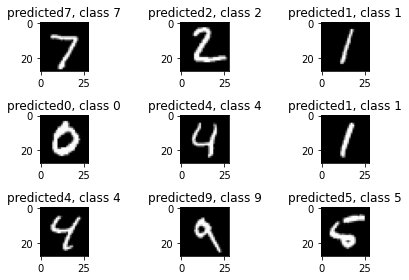

In [ ]:
plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  correct = correct_indices[i]
  plt.imshow(X_test[correct].reshape(28,28),cmap='gray')
  plt.title("predicted{}, class {}".format(predicted_classes[correct],y_test[correct]))
plt.tight_layout()